# Airplane crash investigation analysis

* Description
* Dataset
* Goal
* Imports & Constants
* Data Exploration
* 1) How many planes crashed yearly? Is there any pattern in the day, month or time of the plane crash?
* 2) How many people were on board? how many survived? how many died?


## Description

NOTE: This dataset was taken from kaggle - 
https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

## Dataset

Analysis of the public dataset: "Airplane Crashes and Fatalities Since 1908" (Full history of airplane crashes throughout the world, from 1908-present) hosted by Open Data by Socrata available at:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

## Goal

We will try to answer these questions through the analysis - 

1) How many planes crashed yearly? Is there any pattern in the day, month or time of the plane crash?

2) How many people were on board? how many survived? how many died?

3) Highest number of crashes by operator and Type of aircrafts.

4) ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.

5) Find the number of crashed aircrafts and number of deaths against each category from above step.

## Imports & Constants

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
import datetime
%matplotlib inline

## Data Exploration

Reading the data into a dataframe

In [3]:
crash = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv",low_memory=False)
crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,5,0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1,1,0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0,Hydrogen gas which was being vented was sucked...


Checking the datatypes of all the columns in the dataframe

In [4]:
crash.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

Checking each column to see how much percentage of each column has null values in it. This is to determine which columns would be more significant for analysis.

In [5]:
ind = []
val = []
for col in crash.columns:
    ind.append(col + " % null : ")
    try: 
        value = (pd.isnull(crash[col]).value_counts()[True]/crash.shape[0])*100
    except:
        value = 0
    val.append(round(value,3))
    
null_table = pd.Series(val,index=ind)
null_table.sort_values()

Date % null :              0.000
Fatalities % null :        0.228
Operator % null :          0.342
Location % null :          0.380
Aboard % null :            0.418
Ground % null :            0.418
Type % null :              0.513
Registration % null :      6.359
Summary % null :           7.403
cn/In % null :            23.311
Route % null :            32.384
Time % null :             42.122
Flight # % null :         79.708
dtype: float64

Checking summary statistics to understand the numerical columns of the dataframe

In [6]:
crash.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


Note: I was not able to find out what the column "ground" stands for. Will continue looking but for now, I am excluding that from this analysis

### 1) How many planes crashed yearly? Is there any pattern in the day, month or time of the plane crash?

In [7]:
# changing the datatype of "Date" column from string type to datetime datatype
crash["Date"] = pd.to_datetime(crash["Date"])

# changing the datatype of "Time" column from string to datetime format

def make_datetime(x):
    try: 
        return datetime.datetime.strptime(x, '%H:%M').time()
    except:
        return np.nan

crash["Time"] = crash["Time"].apply(make_datetime)

In [8]:
# Extracting the year, month and day out of the Date column
crash["Year"] = crash["Date"].apply(lambda x: x.year)
months = ["January","February","March","April","May", "June", "July","August","September","October","November","December"]
crash["Month"] = crash["Date"].apply(lambda x: x.month)
crash["Day"] = crash["Date"].apply(lambda x: x.day)

# Extracting the hour out of the time column
# dropping null columns for this analysis
crash_time = crash.dropna(subset=["Time"])
crash_time["Hour"] = crash_time["Time"].apply(lambda x: x.hour)

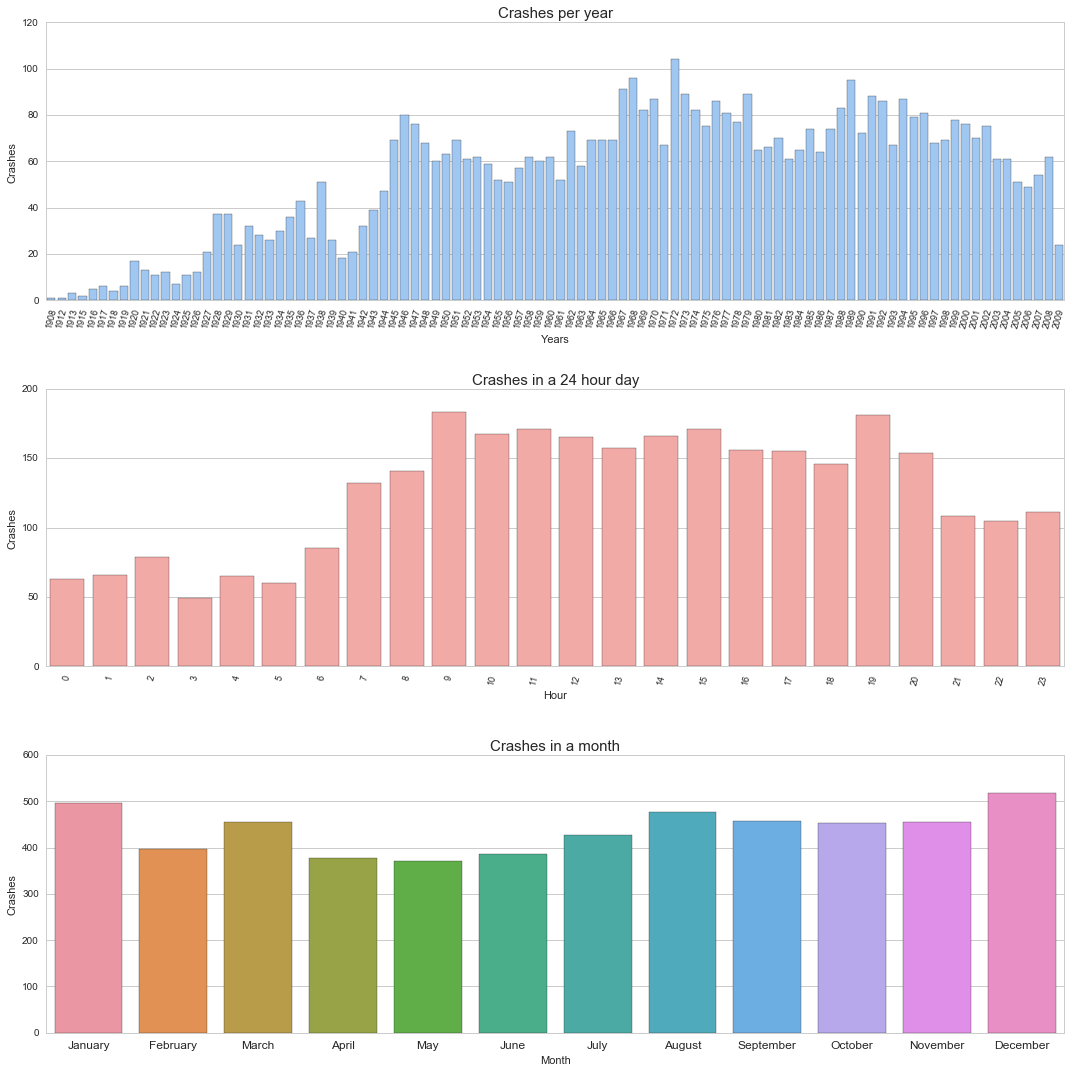

In [9]:
crashes_year = crash["Year"].value_counts().sort_index()
crashes_hour = crash_time["Hour"].value_counts().sort_index()
crashes_month = crash["Month"].value_counts().sort_index()

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,1,1)
sns.barplot(x=crashes_year.index,y=crashes_year.values,ax=ax1,color='b')
ax1.set(ylabel="Crashes",xlabel="Years")
ax1.set_title("Crashes per year",fontsize=15)
ax1.set_xticklabels(crashes_year.index,rotation=75,fontsize=9)


ax2 = fig.add_subplot(3,1,2)
sns.barplot(x=crashes_hour.index,y=crashes_hour.values,ax=ax2,color='r')
ax2.set(ylabel="Crashes",xlabel="Hour")
ax2.set_title("Crashes in a 24 hour day",fontsize=15)
ax2.set_xticklabels(crashes_hour.index,rotation=75,fontsize=9)

ax3 = fig.add_subplot(3,1,3)
sns.barplot(x=crashes_month.index,y=crashes_month.values,ax=ax3)
ax3.set(ylabel="Crashes",xlabel="Month")
ax3.set_title("Crashes in a month",fontsize=15)
ax3.set_xticklabels(months,fontsize=12)


plt.tight_layout(w_pad=4, h_pad=3)
plt.show()

**Insights**

1) We can see in the first plot that, there is a general upward trend in the number of crasher per year until the 1970s and then a steady decline until 2009. We should also keep in mind the proportion increase in flying as a whole. 

2) In the second plot, we can see that there is an increase in the number of crashes as the sun rises and the day progresses and then a decline in the number of crashes as the sun sets. This is a very interesting phenomenon. Could it be because there is more air traffic during the day compared to the evening and night hours?

3) In the third plot, we can see that there is the most crashes happen in December and January and the least in April, May, June and July. This could be due to the harsh weather in the winter compared to the summer months

## 2) How many people were on board? how many survived? how many died?

In [10]:
# dropping null values from Aboard and Fatalities columns and see if there are any outliers (like Fatalities being
# greater than Aboard)
crash[["Aboard","Fatalities"]].dropna()[crash["Fatalities"] > crash["Aboard"]]

,Aboard,Fatalities


In [11]:
# calculating the "Survived" column
crash["Survivors"] = crash["Aboard"] - crash["Fatalities"]
# calculating the total number of survived and fatalaties for each year
aboard_fatalities = crash.pivot_table(values=["Survivors","Fatalities"],index="Year",aggfunc=np.sum)
aboard_fatalities.head()

,Fatalities,Survivors
Year,,
1908,1,1
1912,5,0
1913,45,6
1915,40,20
1916,108,1


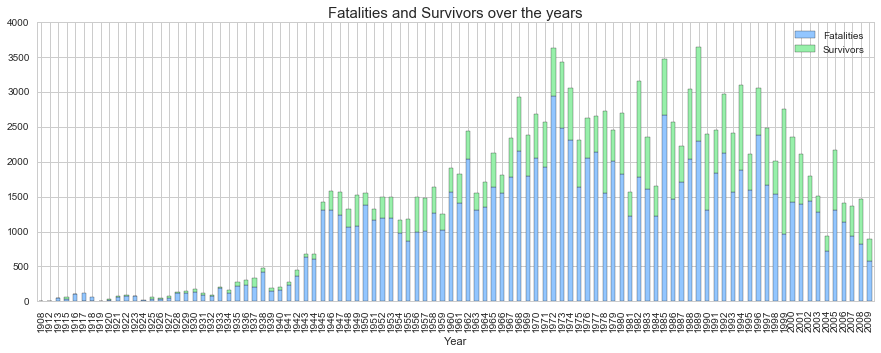

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
aboard_fatalities.plot(kind="bar",stacked=True,ax=ax)
plt.title("Fatalities and Survivors over the years",fontsize=15)
plt.show()

As it is quite clear, there are a large number of fatalities compared to the survivors for crashes in each year

##  2) Highest number of crashes and fatalities by operator and Type of aircrafts

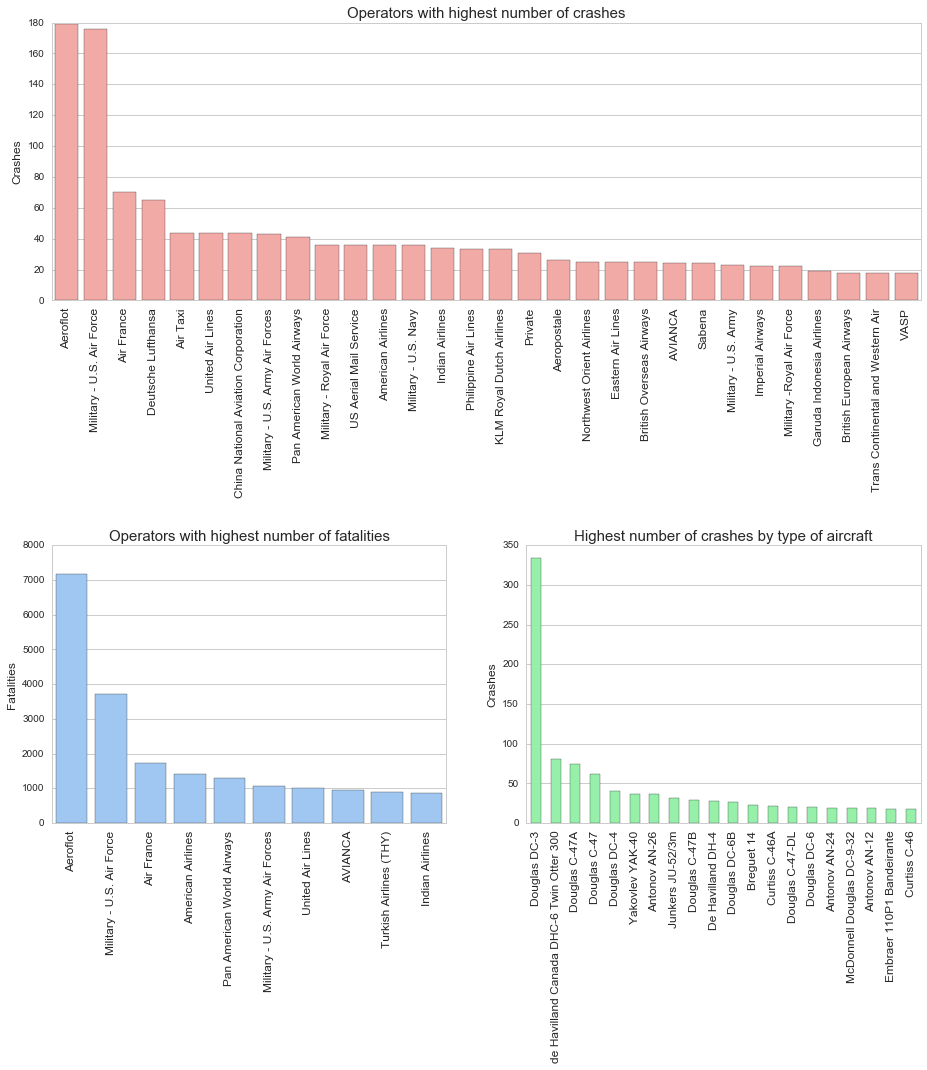

In [13]:
# operators with highest number of fatalities
top_crash = crash.pivot_table(values="Fatalities",index="Operator",aggfunc=np.sum).sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(13,15))

# plotting the operators with highest number of crashes
ax1 = fig.add_subplot(2,1,1)
sns.barplot(x=crash["Operator"].value_counts().head(30).index,y=crash["Operator"].value_counts().head(30).values,ax=ax1,
            color='r')
ax1.set_ylabel("Crashes",fontsize=12)
ax1.set_xticklabels(crash["Operator"].value_counts().head(30).index,rotation=90,fontsize=12)
ax1.set_title("Operators with highest number of crashes",fontsize=15)

#plotting the operators with highest number of fatalities
ax2 = fig.add_subplot(2,2,3)
sns.barplot(x=top_crash.index,y=top_crash.values,ax=ax2,color='b')
ax2.set_ylabel("Fatalities",fontsize=12)
ax2.set_xlabel("")
ax2.set_xticklabels(top_crash.index,rotation=90,fontsize=12)
ax2.set_title("Operators with highest number of fatalities",fontsize=15)

# plotting aircrafts with highest number of crashes
ax3 = fig.add_subplot(2,2,4)
crash["Type"].value_counts().head(20).plot(kind='bar',color='g',ax=ax3)
ax3.set_ylabel("Crashes",fontsize=12)
ax3.set_xticklabels(crash["Type"].value_counts().head(20).index,rotation=90,fontsize=12)
ax3.xaxis.grid(False)
ax3.set_title("Highest number of crashes by type of aircraft",fontsize=15)


plt.tight_layout(w_pad=4, h_pad=3)
plt.show()